In [1]:
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import epsilon_bandit
from infomercial.local_gym import bandit
from infomercial.exp.epsilon_bandit import load_checkpoint
import gym

In [2]:
bandit

<module 'infomercial.local_gym.bandit' from '/Users/qualia/Code/infomercial/infomercial/local_gym/bandit.py'>

In [3]:
# environments = [
#     ['BanditOneHot2', 'v0', 1],
#     ['BanditOneHot10', 'v0', 1],
#     ['BanditOneHot121', 'v0', 1],
#     ['BanditOneHot1000', 'v0', 1],
#     ['BanditEvenOdds2', 'v0', 1],
#     ['BanditOneHigh2', 'v0', 1],
#     ['BanditOneHigh10', 'v0', 1],
#     ['BanditOneHigh121', 'v0', 1],
#     ['BanditOneHigh1000', 'v0', 1],
#     ['BanditHardAndSparse2', 'v0', 1],
#     ['BanditHardAndSparse10', 'v0', 1],
#     ['BanditHardAndSparse121', 'v0', 1],
#     ['BanditHardAndSparse1000', 'v0', 1],
#     ['BanditGaussian10', 'v0', 1],
# ]

In [29]:
env_name = 'BanditOneHigh1000-v0'

# Run bandit exps
episodes, actions, scores_R, values_R = epsilon_bandit(
    env_name=env_name,
    num_episodes=10000, 
    lr=.1, 
    epsilon=.8,
    epsilon_decay_tau=0.001,
    seed_value=179,
    save="exptest_epsilon_bandit_result.pkl"
)

Best arm: 526, last arm: 526


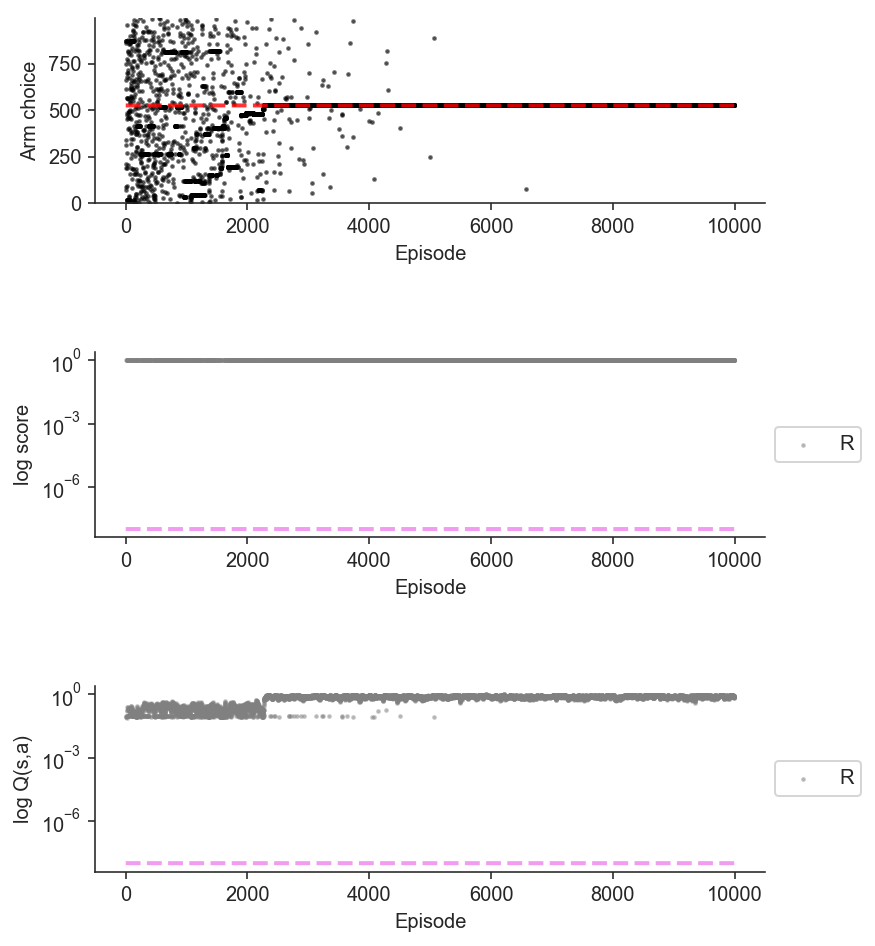

In [30]:
# -
env = gym.make(env_name)
best = env.env.best
print(f"Best arm: {best}, last arm: {actions[-1]}")

# Plotz
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# score
plt.subplot(grid[1, 0])
plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
plt.plot(episodes, np.repeat(tie_threshold, np.max(episodes)+1), 
         color="violet", alpha=0.8, ls='--', linewidth=2)
plt.ylabel("log score")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[2, 0])
plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="R")
plt.plot(episodes, np.repeat(tie_threshold, np.max(episodes)+1), 
         color="violet", alpha=0.8, ls='--', linewidth=2)
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

In [31]:
# Test load of saved
result = load_checkpoint("exptest_epsilon_bandit_result.pkl")

In [33]:
result['critic_R']

OrderedDict([(0, 0.0),
             (1, 0.09087641099999999),
             (2, 0.0),
             (3, 0),
             (4, 0.0),
             (5, 0),
             (6, 0.081),
             (7, 0),
             (8, 0.0),
             (9, 0.0),
             (10, 0),
             (11, 0.0),
             (12, 0),
             (13, 0),
             (14, 0.0),
             (15, 0),
             (16, 0.0),
             (17, 0),
             (18, 0.0),
             (19, 0.0),
             (20, 0.09295202005314596),
             (21, 0.0),
             (22, 0.0),
             (23, 0),
             (24, 0.09),
             (25, 0.09),
             (26, 0.0),
             (27, 0.09),
             (28, 0.0),
             (29, 0),
             (30, 0),
             (31, 0),
             (32, 0.09406601280142149),
             (33, 0),
             (34, 0.09),
             (35, 0),
             (36, 0),
             (37, 0.081),
             (38, 0.0),
             (39, 0),
             (40, 0.0),
  